In [14]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [15]:
# Step 1: Load the Penguins dataset
data = sns.load_dataset('penguins')

In [16]:
# Step 2: Initial EDA
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [17]:
data.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [18]:
data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [19]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [20]:
# Drop rows with missing values for simplicity
#data.dropna(inplace=True)

In [21]:
data['bill_length_mm'] = data['bill_length_mm'].fillna(data['bill_length_mm'].median())

In [22]:
#type(median_cols)

In [23]:
median_cols = ['bill_depth_mm','flipper_length_mm','body_mass_g']
data[median_cols] = data[median_cols].fillna(data[median_cols].median())

In [24]:
data['sex']=data['sex'].fillna(data['sex'].mode()[0])

In [25]:
# Step 3: Identify columns for processing
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_cols = ['species', 'sex', 'island']

In [26]:
#data[col] > upper_bound

In [27]:
# Calculate IQR for numerical columns
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print()


Column: bill_length_mm
Number of outliers: 0

Column: bill_depth_mm
Number of outliers: 0

Column: flipper_length_mm
Number of outliers: 0

Column: body_mass_g
Number of outliers: 0



In [28]:
# Encode the target column (species) with LabelEncoder
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

In [29]:
# Step 4: Split data into train-test
X = data.drop(['species'], axis =1)
X =data.drop(categorical_cols, axis=1)
y = data['species']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 5: Initial Model Training
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [31]:
print("Initial Model Results:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Initial Model Results:


C:\Users\USER\anaconda3\envs\env23\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:
Accuracy: 0.99
Confusion Matrix:
[[34  0  0]
 [ 1  9  0]
 [ 0  0 25]]

Decision Tree:
Accuracy: 0.99
Confusion Matrix:
[[34  0  0]
 [ 1  9  0]
 [ 0  0 25]]

Random Forest:
Accuracy: 0.99
Confusion Matrix:
[[34  0  0]
 [ 1  9  0]
 [ 0  0 25]]


In [32]:
# next step: Add Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nModel Results After Scaling:")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Model Results After Scaling:

Logistic Regression:
Accuracy: 0.99
Confusion Matrix:
[[34  0  0]
 [ 1  9  0]
 [ 0  0 25]]

Decision Tree:
Accuracy: 0.99
Confusion Matrix:
[[34  0  0]
 [ 1  9  0]
 [ 0  0 25]]

Random Forest:
Accuracy: 0.99
Confusion Matrix:
[[34  0  0]
 [ 1  9  0]
 [ 0  0 25]]


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int32  
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), int32(1), object(2)
memory usage: 17.6+ KB


In [34]:
#Next Step: OneHotEncode categorical features
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = ohe.fit_transform(data[['sex', 'island']])
encoded_cats_df = pd.DataFrame(encoded_cats, 
                               columns=ohe.get_feature_names_out(['sex', 'island'])
                               ,index = data.index #!!!!!
                              )

# Combine numerical and encoded categorical features
data = pd.concat([data.drop(['sex', 'island'], axis=1), encoded_cats_df], axis=1)


In [35]:
X = data.drop(['species'], axis =1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [36]:
#  Scale only numerical columns
#scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [37]:

print("\nModel Results After Scaling:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Model Results After Scaling:

Logistic Regression:
Accuracy: 1.00
Confusion Matrix:
[[34  0  0]
 [ 0 10  0]
 [ 0  0 25]]

Decision Tree:
Accuracy: 0.99
Confusion Matrix:
[[34  0  0]
 [ 1  9  0]
 [ 0  0 25]]

Random Forest:
Accuracy: 1.00
Confusion Matrix:
[[34  0  0]
 [ 0 10  0]
 [ 0  0 25]]


In [42]:
# Step 6: Fine-tuning Parameters
print("\nFine-tuning Logistic Regression:")
log_reg = LogisticRegression(max_iter=50)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print("\nFine-tuning Decision Tree:")
dec_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print("\nFine-tuning Random Forest:")
rand_forest = RandomForestClassifier(n_estimators=200, random_state=42)
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Fine-tuning Logistic Regression:
Accuracy: 0.99

Fine-tuning Decision Tree:
Accuracy: 0.99

Fine-tuning Random Forest:
Accuracy: 1.00


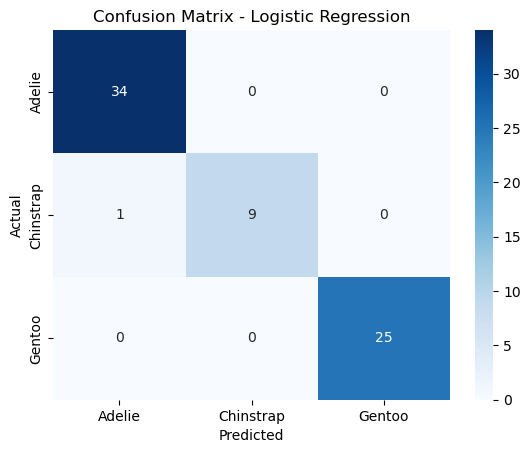

In [39]:
# Step 7: Confusion Matrix Heatmap for Logistic Regression
cm = confusion_matrix(y_test, log_reg.predict(X_test_scaled))
sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

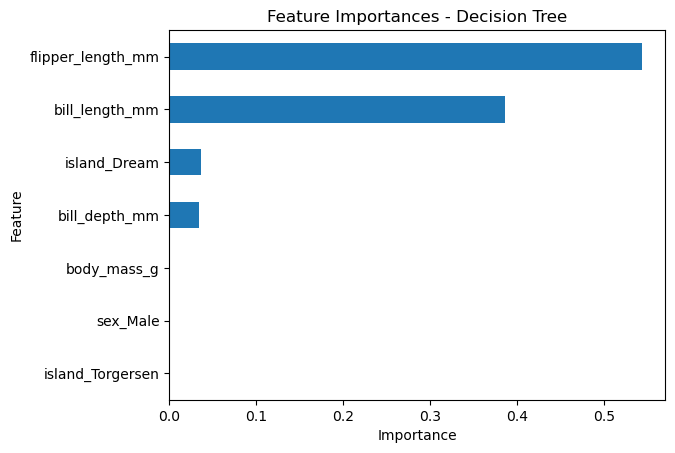

In [43]:
# Step 8: Feature Importances for Decision Tree
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': dec_tree.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances.plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Decision Tree')
plt.gca().invert_yaxis()
plt.show()

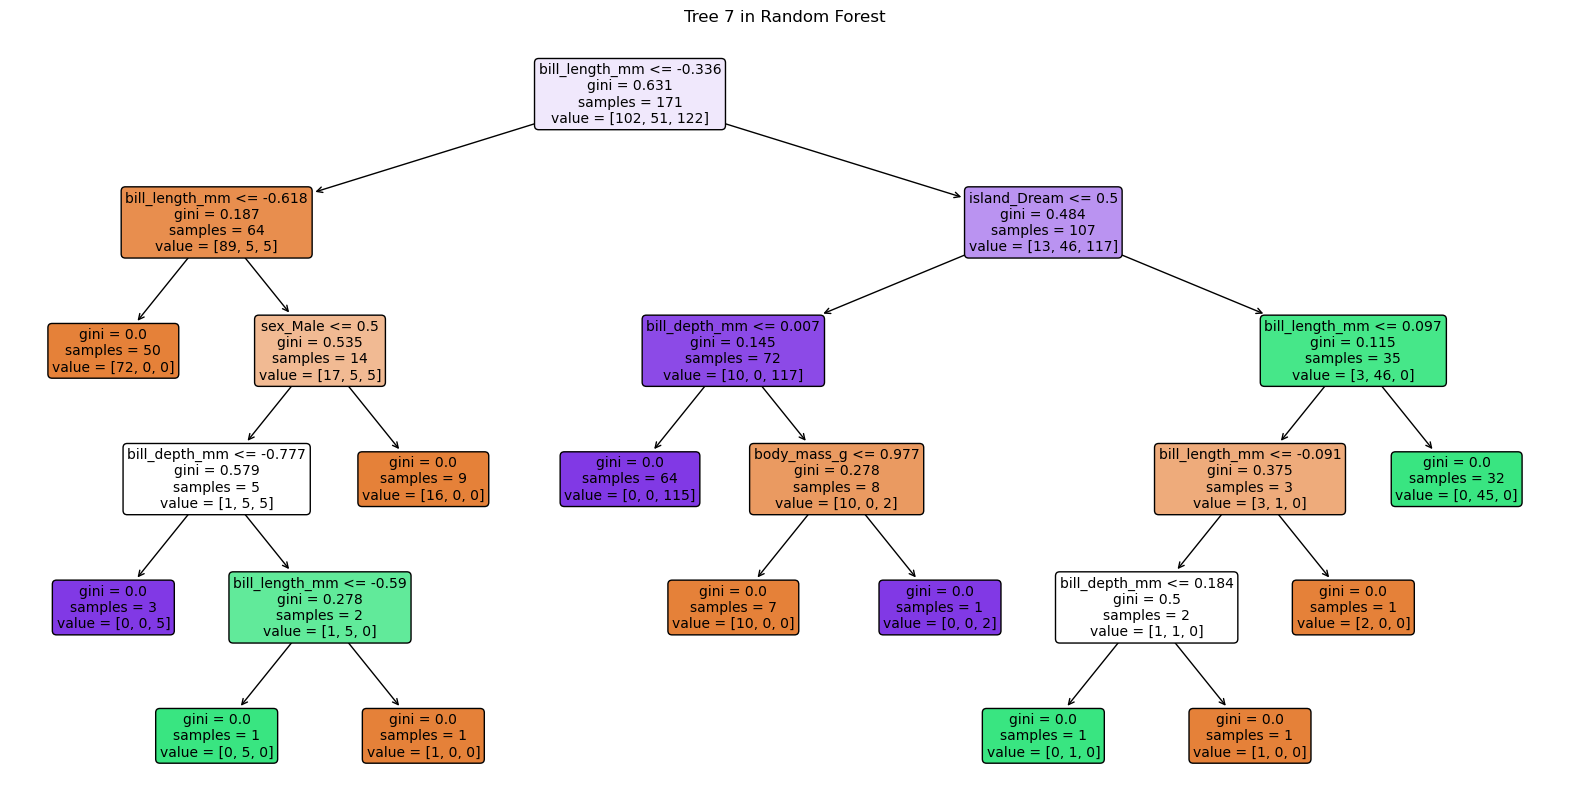

In [41]:
# Step 10: Visualizing Tree 7 in Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rand_forest.estimators_[7], feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title('Tree 7 in Random Forest')
plt.show()